In [9]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix  
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [10]:
# Load data from numpy file
X =  np.load('feat.npy')
y =  np.load('label.npy').ravel()

In [11]:
# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [12]:
# Simple SVM
print('fitting...')
clf = SVC(C=20.0, gamma=0.00001)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)

fitting...
acc=0.725


In [13]:

# Grid search for best parameters
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4, 1e-5],
                     'C': [1, 10 ,20,30,40,50]}]

In [14]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print('')

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print('')
    print(clf.best_params_)
    print('')
    print("Grid scores on development set:")
    print('')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 1e-05, 'kernel': 'sigmoid'}

Grid scores on development set:

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 10, 'gamma': 1e-05, 'kernel': 'sigmoid'}

Grid scores on development set:



In [15]:
 for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print('')

print("Detailed classification report:")
print('')
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print('')
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('')


0.100 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.115 (+/-0.037) for {'C': 1, 'gamma': 1e-05, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.188 (+/-0.136) for {'C': 10, 'gamma': 1e-05, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 20, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.129 (+/-0.084) for {'C': 20, 'gamma': 1e-05, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 30, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 30, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.157 (+/-0.120) for {'C': 30, 'gamma': 1e-05, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 40, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.100 (+/-0.000) for {'C': 40, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.139 (+/-0.112) for {'C': 40, 'gamma': 1e-05,

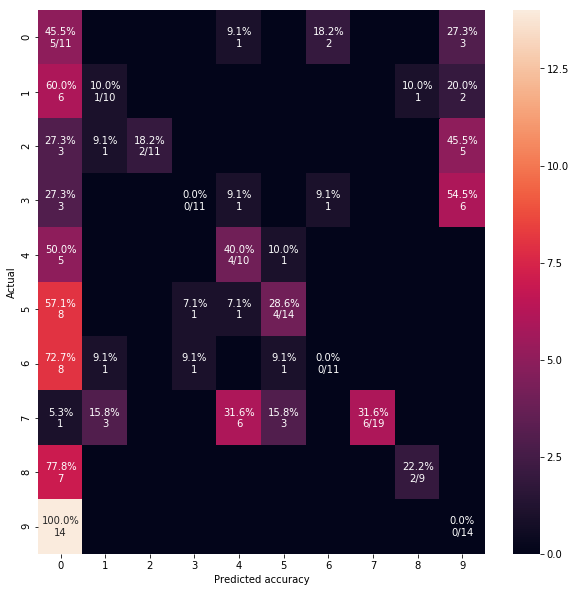

In [16]:
labels = [0,1,2,3,4,5,6,7,8,9]

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted accuracy'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)
    
    
cm_analysis(y_true, y_pred,"sigmoid", labels, ymap=None, figsize=(10,10))